In [ ]:

!pip install pandas nltk spacy -q
!python -m spacy download en_core_web_sm

import pandas as pd, re, nltk, spacy
from nltk.corpus import stopwords
nltk.download('stopwords')

df = pd.read_csv('financial_news_events.csv')
print("Dataset shape:", df.shape)
df.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Dataset shape: (3024, 12)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url
0,2025-05-21,Nikkei 225 index benefits from a weaker yen,Times of India,Commodity Price Shock,DAX,3.52,166.45,NaN,Technology,High,Goldman Sachs,https://timesofindia.indiatimes.com/business/m...
1,2025-05-18,Government subsidy program gives a lift to the...,Financial Times,Central Bank Meeting,Shanghai Composite,-3.39,57.61,NaN,Retail,Low,ExxonMobil,https://timesofindia.indiatimes.com/business/m...
2,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500
3,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...
4,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...


In [ ]:
# Load dataset
df = pd.read_csv('financial_news_events.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3024, 12)


,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url
0,2025-05-21,Nikkei 225 index benefits from a weaker yen,Times of India,Commodity Price Shock,DAX,3.52,166.45,NaN,Technology,High,Goldman Sachs,https://timesofindia.indiatimes.com/business/m...
1,2025-05-18,Government subsidy program gives a lift to the...,Financial Times,Central Bank Meeting,Shanghai Composite,-3.39,57.61,NaN,Retail,Low,ExxonMobil,https://timesofindia.indiatimes.com/business/m...
2,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500
3,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...
4,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...


In [ ]:
import pandas as pd
import re

df = pd.read_csv('financial_news_events.csv')
print("Original shape:", df.shape)

#  Remove rows fully empty
df.dropna(how='all', inplace=True)

df.fillna({
    "Headline": "Unknown headline",
    "Market_Event": "Unknown event",
    "Sector": "Unknown sector",
    "Related_Company": "Unknown company",
    "Sentiment": "Neutral"
}, inplace=True)

# Clean text columns
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[\$€₹]', ' currency ', text)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

text_cols = ["Headline", "Market_Event", "Sector"]
for col in text_cols:
    if col in df.columns:
        df[col + "_clean"] = df[col].apply(clean_text)

print(" Cleaned shape:", df.shape)
df.head()


Original shape: (3024, 12)
✅ Cleaned shape: (3024, 15)


,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url,Headline_clean,Market_Event_clean,Sector_clean
0,2025-05-21,Nikkei 225 index benefits from a weaker yen,Times of India,Commodity Price Shock,DAX,3.52,166.45,Neutral,Technology,High,Goldman Sachs,https://timesofindia.indiatimes.com/business/m...,nikkei 225 index benefits from a weaker yen,commodity price shock,technology
1,2025-05-18,Government subsidy program gives a lift to the...,Financial Times,Central Bank Meeting,Shanghai Composite,-3.39,57.61,Neutral,Retail,Low,ExxonMobil,https://timesofindia.indiatimes.com/business/m...,government subsidy program gives a lift to the...,central bank meeting,retail
2,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500,new housing data release shows a slowdown in m...,consumer confidence report,retail
3,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...,massive stock buyback program announced by a c...,commodity price shock,consumer goods
4,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...,government spending bill is expected to stimul...,inflation data release,consumer goods


In [ ]:
# Initialize spaCy model
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    text = str(text).lower()                          # lowercase
    text = re.sub(r'[\$€₹]', ' currency ', text)      # replace symbols
    text = re.sub(r'[^a-z0-9\s]', ' ', text)          # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    return text

def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Example
df["Normalized"] = df["Headline"].apply(normalize_text)
df["Tokens"] = df["Normalized"].apply(tokenize_text)
df[["Headline","Normalized","Tokens"]].head()


,Headline,Normalized,Tokens
0,Nikkei 225 index benefits from a weaker yen,nikkei 225 index benefits from a weaker yen,"[nikkei, 225, index, benefits, from, a, weaker..."
1,Government subsidy program gives a lift to the...,government subsidy program gives a lift to the...,"[government, subsidy, program, gives, a, lift,..."
2,New housing data release shows a slowdown in m...,new housing data release shows a slowdown in m...,"[new, housing, data, release, shows, a, slowdo..."
3,Massive stock buyback program announced by a c...,massive stock buyback program announced by a c...,"[massive, stock, buyback, program, announced, ..."
4,Government spending bill is expected to stimul...,government spending bill is expected to stimul...,"[government, spending, bill, is, expected, to,..."


In [ ]:
financial_terms = {
    "p e ratio": "price to earnings ratio",
    "eps": "earnings per share",
    "ebitda": "earnings before interest taxes depreciation amortization",
    "roi": "return on investment",
    "m&a": "mergers and acquisitions"
}

def clean_financial_terms(text):
    for key, val in financial_terms.items():
        text = re.sub(r'\b'+key+r'\b', val, text)
    return text

df["Cleaned_Financial"] = df["Normalized"].apply(clean_financial_terms)
df[["Normalized","Cleaned_Financial"]].head()


,Normalized,Cleaned_Financial
0,nikkei 225 index benefits from a weaker yen,nikkei 225 index benefits from a weaker yen
1,government subsidy program gives a lift to the...,government subsidy program gives a lift to the...
2,new housing data release shows a slowdown in m...,new housing data release shows a slowdown in m...
3,massive stock buyback program announced by a c...,massive stock buyback program announced by a c...
4,government spending bill is expected to stimul...,government spending bill is expected to stimul...


In [ ]:
stop_words = set(stopwords.words('english'))

def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.text not in stop_words]
    return " ".join(lemmas)

df["Lemmatized"] = df["Cleaned_Financial"].apply(lemmatize_text)
df[["Cleaned_Financial","Lemmatized"]].head()


,Cleaned_Financial,Lemmatized
0,nikkei 225 index benefits from a weaker yen,nikkei 225 index benefit weak yen
1,government subsidy program gives a lift to the...,government subsidy program give lift agricultu...
2,new housing data release shows a slowdown in m...,new housing datum release show slowdown market...
3,massive stock buyback program announced by a c...,massive stock buyback program announce consume...
4,government spending bill is expected to stimul...,government spending bill expect stimulate economy


In [ ]:
from google.colab import files

files.download("/content/financial_news_preprocessed.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd


# Replace missing values
df['Index_Change_Percent'].fillna(0, inplace=True)
df['News_Url'].fillna('No URL', inplace=True)

df.fillna(value={col: 'Unknown' for col in df.select_dtypes(include='object').columns}, inplace=True)

print(df.isnull().sum())


Date                    0
Headline                0
Source                  0
Market_Event            0
Market_Index            0
Index_Change_Percent    0
Trading_Volume          0
Sentiment               0
Sector                  0
Impact_Level            0
Related_Company         0
News_Url                0
Headline_clean          0
Market_Event_clean      0
Sector_clean            0
Normalized              0
Tokens                  0
Cleaned_Financial       0
Lemmatized              0
dtype: int64


/tmp/ipython-input-3284434931.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Index_Change_Percent'].fillna(0, inplace=True)   # numeric column
/tmp/ipython-input-3284434931.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
# After filling missing values
df.to_csv("/content/financial_news_preprocessed.csv", index=False)
print("✅ Updated file saved as financial_news_preprocessed.csv")


✅ Updated file saved as financial_news_preprocessed.csv


✅ Data Loaded!
Shape: (3024, 19)

--- Dataset Overview ---
         Date                                           Headline  \
0  2025-05-21        Nikkei 225 index benefits from a weaker yen   
1  2025-05-18  Government subsidy program gives a lift to the...   
2  2025-06-25  New housing data release shows a slowdown in m...   
3  2025-07-21  Massive stock buyback program announced by a c...   
4  2025-07-23  Government spending bill is expected to stimul...   

                    Source                Market_Event        Market_Index  \
0           Times of India       Commodity Price Shock                 DAX   
1          Financial Times        Central Bank Meeting  Shanghai Composite   
2  The Hindu Business Line  Consumer Confidence Report  Shanghai Composite   
3            The Economist       Commodity Price Shock           NSE Nifty   
4          The Motley Fool      Inflation Data Release    Nasdaq Composite   

   Index_Change_Percent  Trading_Volume Sentiment          Sect

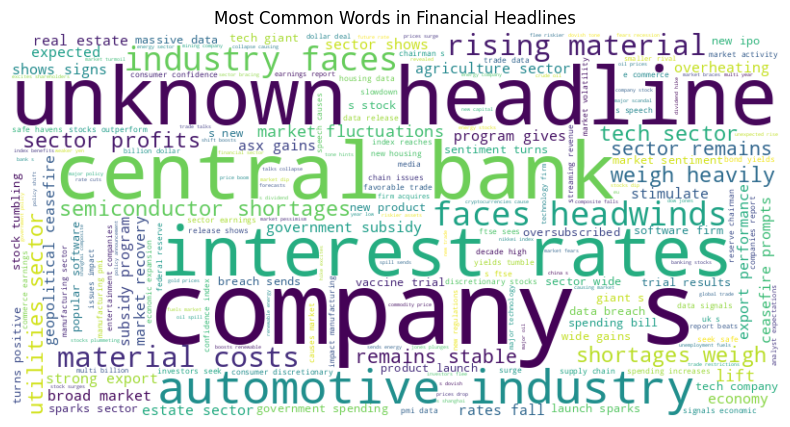

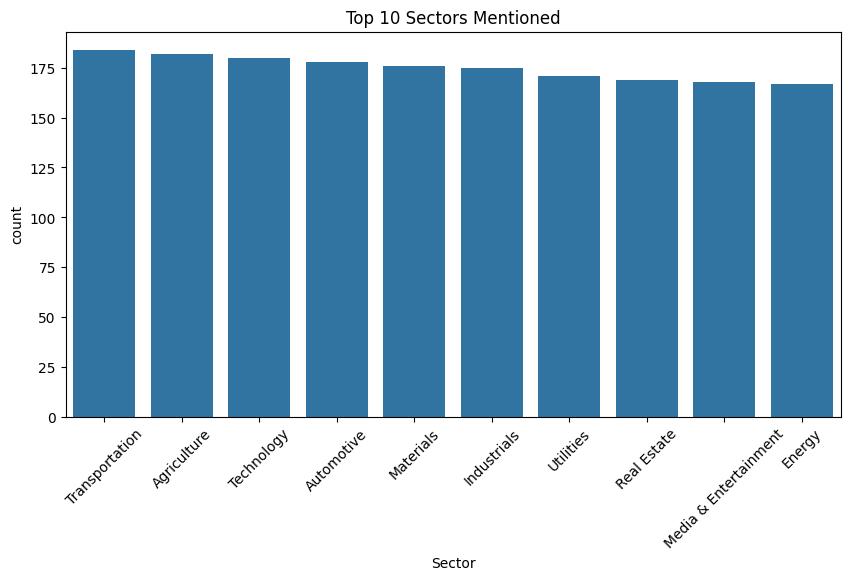

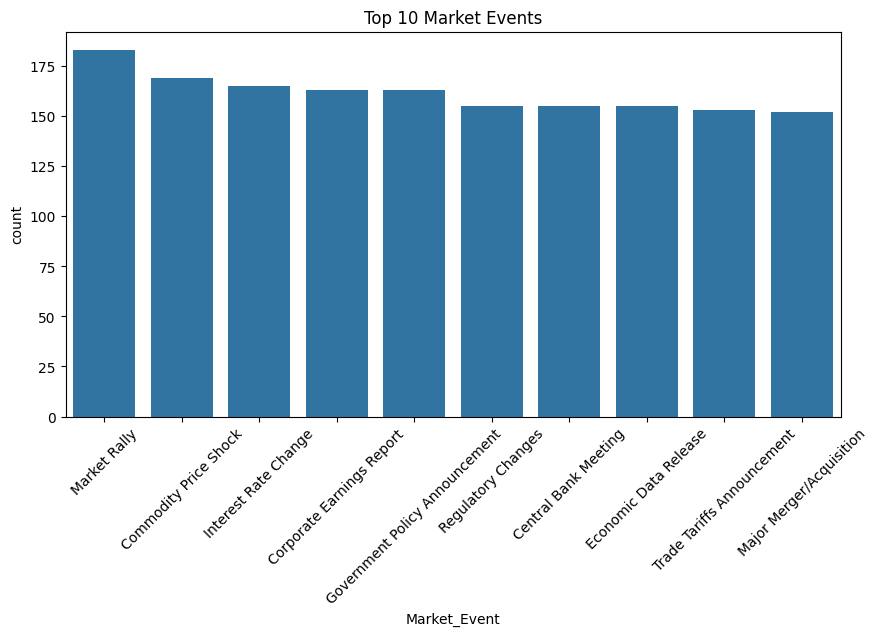

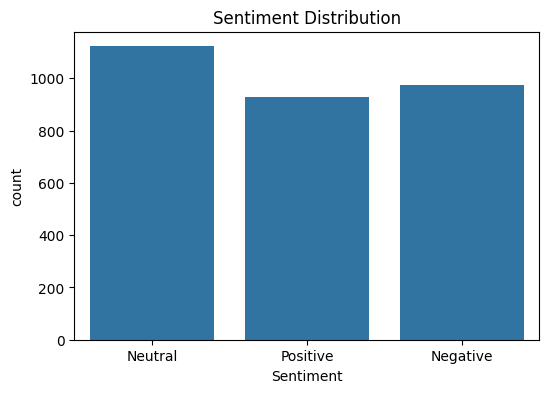

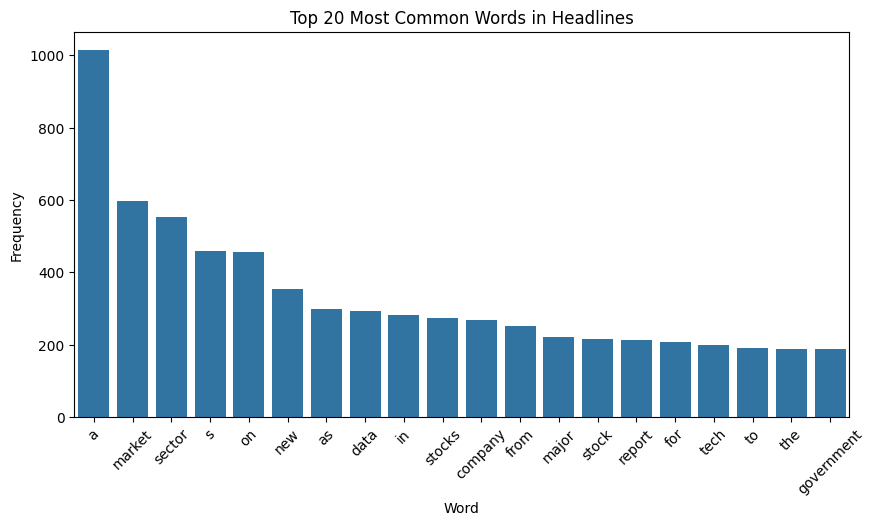


✅ EDA Completed Successfully!


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv("financial_news_preprocessed.csv")

print(" Data Loaded!")
print("Shape:", df.shape)
print("\n--- Dataset Overview ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Column Info ---")
print(df.describe(include='all'))

#Value counts (categorical columns)
categorical_cols = ['Sector', 'Market_Event', 'Sentiment']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nTop categories in {col}:")
        print(df[col].value_counts().head(10))

#  Word Cloud for Headlines
if 'Headline_clean' in df.columns:
    text = ' '.join(df['Headline_clean'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Words in Financial Headlines")
    plt.show()

#  Bar plots for top categories
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Sector', order=df['Sector'].value_counts().index[:10])
plt.title("Top 10 Sectors Mentioned")
plt.xticks(rotation=45)
plt.show()

if 'Market_Event' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='Market_Event', order=df['Market_Event'].value_counts().index[:10])
    plt.title("Top 10 Market Events")
    plt.xticks(rotation=45)
    plt.show()

if 'Sentiment' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Sentiment')
    plt.title("Sentiment Distribution")
    plt.show()

#  Word frequency bar chart
from collections import Counter

if 'Headline_clean' in df.columns:
    words = ' '.join(df['Headline_clean']).split()
    common_words = Counter(words).most_common(20)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10,5))
    sns.barplot(x='Word', y='Frequency', data=words_df)
    plt.title("Top 20 Most Common Words in Headlines")
    plt.xticks(rotation=45)
    plt.show()

print("\n✅ EDA Completed Successfully!")


In [ ]:
import pandas as pd
import random
import re
from textblob import TextBlob
from googletrans import Translator

df = pd.read_csv("/content/financial_news_preprocessed.csv")

translator = Translator()

def back_translate(text, src='en', mid='fr'):
    """Translate English -> French -> English"""
    try:
        return translator.translate(translator.translate(text, dest=mid).text, dest=src).text
    except:
        return text

def synonym_replace(text, n=2):
    words = text.split()
    new_words = words.copy()
    random_indices = random.sample(range(len(words)), min(n, len(words)))
    for i in random_indices:
        blob = TextBlob(words[i])
        syns = blob.words[0].synsets
        if syns:
            lemma = syns[0].lemmas()[0].name().replace("_", " ")
            new_words[i] = lemma
    return " ".join(new_words)

#  Entity Masking
def entity_masking(text):
    # Mask company/market entities (capital letters) and numbers
    text = re.sub(r'\b[A-Z]{2,}\b', 'ENTITY', text)  # COMPANY / INDEX
    text = re.sub(r'\b\d+(\.\d+)?\b', 'NUMBER', text)  # Replace numbers
    return text

#  Augmentation
sample_df = df.sample(min(10, len(df)), random_state=42)

sample_df['BT_Augmented'] = sample_df['Headline_clean'].apply(back_translate)
sample_df['Syn_Augmented'] = sample_df['Headline_clean'].apply(synonym_replace)
sample_df['Mask_Augmented'] = sample_df['Headline_clean'].apply(entity_masking)

print("\n--- Augmented Samples ---")
print(sample_df[['Headline_clean', 'BT_Augmented', 'Syn_Augmented', 'Mask_Augmented']])

df.to_csv("/content/financial_news_augmented.csv", index=False)
print("\n✅ Augmented dataset saved as financial_news_augmented.csv")



--- Augmented Samples ---
                                         Headline_clean  \
3015  media and entertainment companies report a sur...   
251   banking stocks dip after a major scandal is re...   
1709  a massive data breach sends a tech company s s...   
1609    consumer confidence index reaches a decade high   
1018                                   unknown headline   
1213  china s shanghai composite falls after new tra...   
52    media and entertainment companies report a sur...   
2171  supply chain issues impact manufacturing secto...   
1359  china s shanghai composite falls after new tra...   
414   automotive industry faces headwinds from risin...   

                                           BT_Augmented  \
3015  Media and entertainment companies report an in...   
251   Banking values ​​drop after the revelation of ...   
1709  A massive violation of data causes the actions...   
1609  The consumer confidence index has reached its ...   
1018                        

In [ ]:
from google.colab import files

files.download("/content/financial_news_augmented.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download the missing TextBlob corpus
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
